In [5]:
import PIL
import os
import requests

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from dotenv import load_dotenv

In [6]:
load_dotenv()

True

In [4]:
goal_map_1 = cv.imread("../data/originals/17/82877412.tif")
goal_map_2 = cv.imread("../data/originals/17/82877409.tif")
goal_map_3 = cv.imread("../data/originals/17/82877415.tif")
goal_map_4 = cv.imread("../data/originals/17/82877418.tif")
goal_map_5 = cv.imread("../data/originals/13/82877928.tif")
goal_map_6 = cv.imread("../data/originals/13/82877931.tif")
goal_map_7 = cv.imread("../data/originals/34/82877337.tif")
goal_map_8 = cv.imread("../data/originals/34/82877340.tif")

In [5]:
print(goal_map_1.shape)
print(goal_map_2.shape)
print(goal_map_3.shape)
print(goal_map_4.shape)
print(goal_map_5.shape)
print(goal_map_6.shape)
print(goal_map_7.shape)
print(goal_map_8.shape)

(2541, 3812, 3)
(2546, 3820, 3)
(2542, 3813, 3)
(2544, 3816, 3)
(2547, 3821, 3)
(2540, 3810, 3)
(2546, 3819, 3)
(2544, 3816, 3)


In [6]:
print(goal_map_1.shape[1]/goal_map_1.shape[0])
print(goal_map_2.shape[1]/goal_map_2.shape[0])
print(goal_map_3.shape[1]/goal_map_3.shape[0])
print(goal_map_4.shape[1]/goal_map_4.shape[0])
print(goal_map_5.shape[1]/goal_map_5.shape[0])
print(goal_map_6.shape[1]/goal_map_6.shape[0])
print(goal_map_7.shape[1]/goal_map_7.shape[0])
print(goal_map_8.shape[1]/goal_map_8.shape[0])

1.5001967729240457
1.500392772977219
1.5
1.5
1.5001963093835886
1.5
1.5
1.5


In [9]:
x_1 = [-3.192112616595414,55.9423625178286]
x_2 = [
                  -3.149118538110902,
                  55.94277108265303
                ]
x_3 = [
                  -3.149638014166486,
                  55.96030038664902
                ]
x_4 = [
                  -3.192651513330189,
                  55.95989155384999
                ]
a = np.array([x_1,x_2,x_3,x_4])

In [12]:
mean_long_lat = np.mean(a, axis = 0)
print(mean_long_lat)

[-3.17088017 55.95133139]


In [110]:
top_left = x_1
bottom_right = x_3

minx = -3.190359
miny = 55.944128
maxx = -3.151644
maxy = 55.958644

geoapify_url = "https://maps.geoapify.com/v1/staticmap"
geoapify_request_dict = {"apiKey" : os.environ["GEOAPIFY_KEY"],
                         "style" : "osm-carto",
                         "area" : f"rect:{minx},{miny},{maxx},{maxy}",
                         "height" : 2550, 
                         "width" : 3825,
                         "scaleFactor" : 1
                        }


response = requests.get(geoapify_url, params = geoapify_request_dict)

# Save the image
with open("../data/map_patch_2.png", "wb") as f:
    f.write(response.content)

In [104]:
def show_map(img):
    fig, ax = plt.subplots(figsize = (10,5))
    ax.imshow(img)
    plt.show()

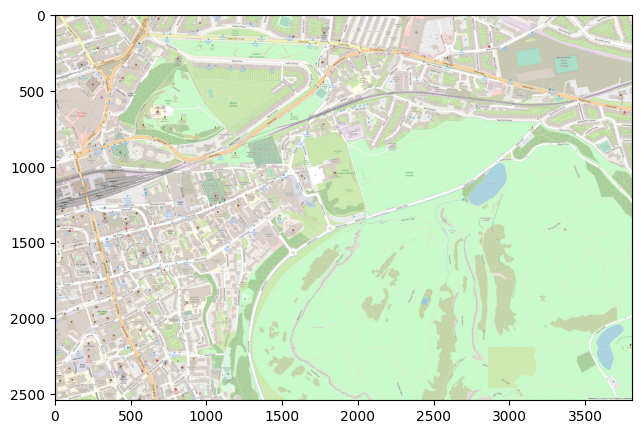

In [113]:
fetched = PIL.Image.open("../data/map_patch.png")
show_map(fetched)

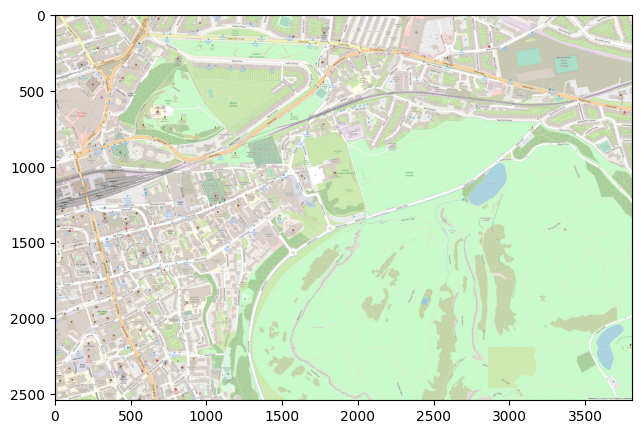

In [114]:
fetched_2 = PIL.Image.open("../data/map_patch_2.png")
show_map(fetched)

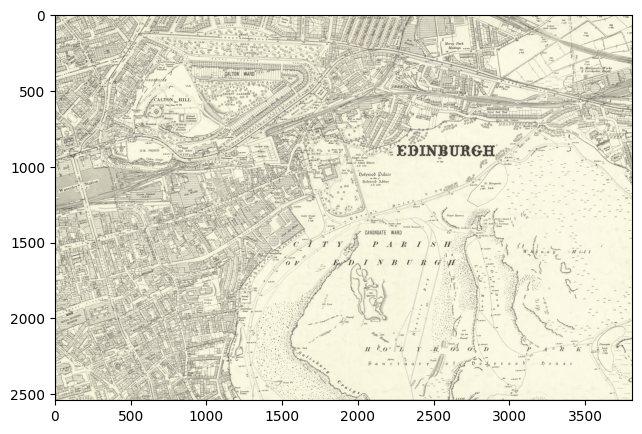

In [27]:
goal = PIL.Image.open("../data/originals/17/82877412.tif")
show_map(goal)

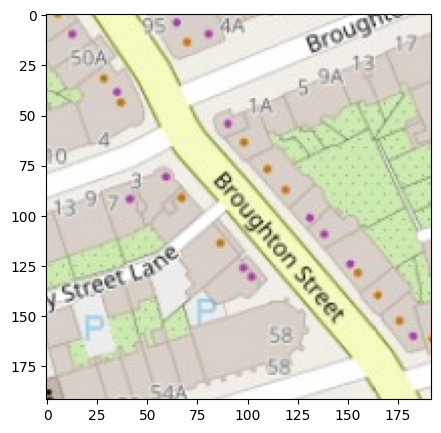

In [117]:
show_map(np.array(fetched)[:64*3,:64*3,:])

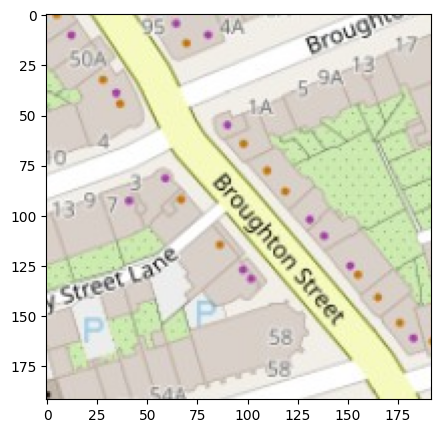

In [118]:
show_map(np.array(fetched_2)[:64*3,:64*3,:])

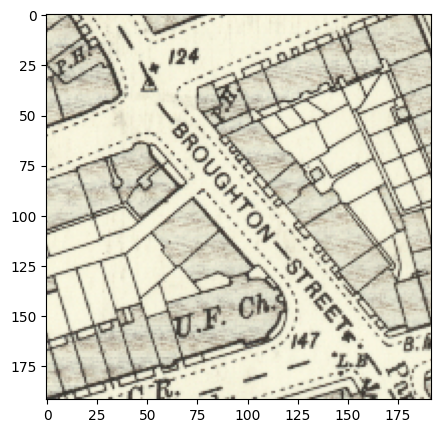

In [119]:
show_map(np.array(goal)[:64*3,:64*3,:])